In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
X = 6* np.random.rand(100,1)-3
Y = 0.5 * X**2 + 1.5*X + 2 + np.random.randn(100,1)
## quardratic equation used => 0.5X^2 + 1.5X + 2+randomNo

Text(0, 0.5, 'Y databse')

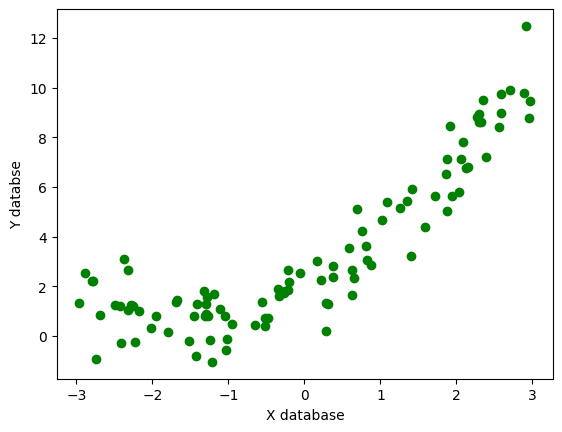

In [7]:
plt.scatter(X,Y,color='g')
plt.xlabel('X database')
plt.ylabel('Y databse')

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [9]:
## Simple linear Regression
from sklearn.linear_model import LinearRegression
regression_1 = LinearRegression() 

In [10]:
regression_1.fit(X_train,Y_train)

LinearRegression()

In [11]:
from sklearn.metrics import r2_score
score = r2_score(Y_test,regression_1.predict(X_test))
print(score)

0.7208464365161492


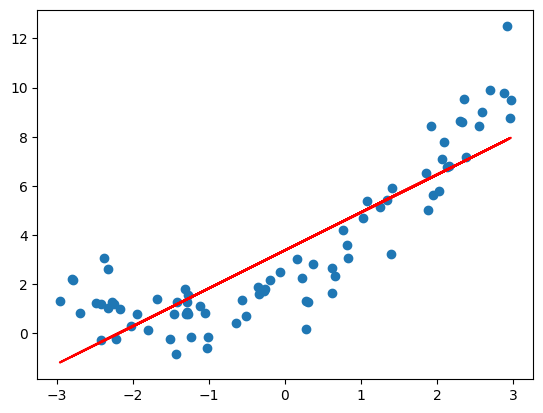

In [12]:
## visualization 
plt.plot(X_train,regression_1.predict(X_train),color='r')
plt.scatter(X_train,Y_train)


In [13]:
## apply polynomial transformation
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2,include_bias=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [14]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train_poly,Y_train) 
Y_pred = regression.predict(X_test_poly)
scoree = r2_score(Y_test,Y_pred)
print(scoree)

0.8828175815947816


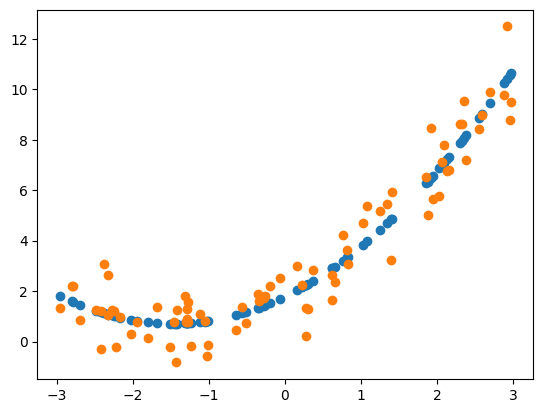

In [15]:
plt.scatter(X_train,regression.predict(X_train_poly))
plt.scatter(X_train,Y_train)

In [16]:
#prediction of new dataset
X_new = np.linspace(-3,3,200).reshape(200,1)
X_new_poly = poly.transform(X_new)

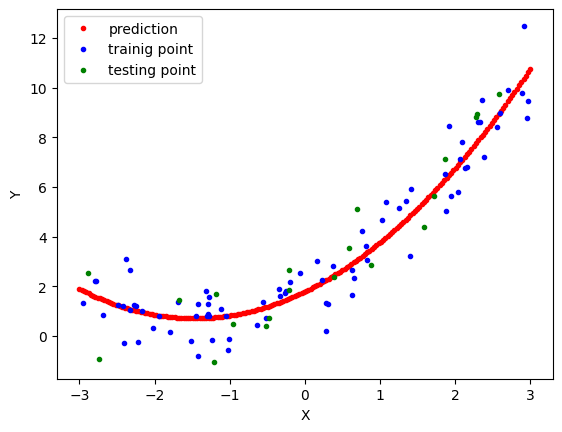

In [17]:
Y_new = regression.predict(X_new_poly)
plt.plot(X_new,Y_new,"r.",linewidth=2,label="prediction")
plt.plot(X_train,Y_train,"b.",label="trainig point")
plt.plot(X_test,Y_test,"g.",label="testing point")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

### pipeline concept in polymorphism

In [18]:
from sklearn.pipeline import Pipeline

In [30]:
def Poly_regression(degree):
    X_new = np.linspace(-3,3,200).reshape(200,1)
    poly_features = PolynomialFeatures(degree=degree,include_bias=True)
    lin_reg = LinearRegression()
    poly_regression = Pipeline([
        ("poly_features",poly_features),
        ("lin_reg",lin_reg)
    ])
    poly_regression.fit(X_train,Y_train)
    y_pred_new = poly_regression.predict(X_new)

    ## plotting prediction line
    plt.plot(X_new,y_pred_new,'r',label='degree'+ str(degree),linewidth=2)
    plt.plot(X_train,Y_train,'b',linewidth=3)
    plt.plot(X_test,Y_test,'g',linewidth=3)
    plt.legend(loc='upper left')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.axis([-4,4,0,10])
    plt.show()

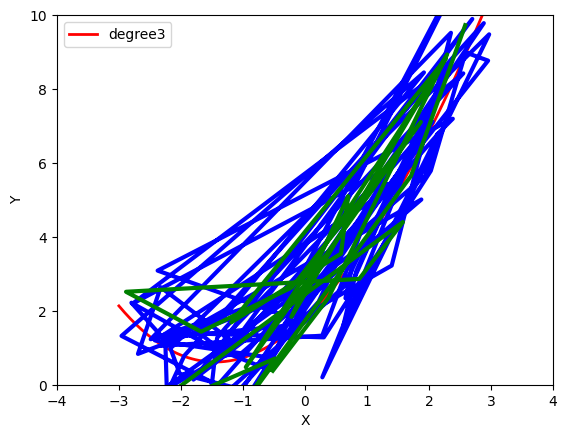

In [31]:
Poly_regression(3)